# Descriptive Plots for SABE Dataset

This notebook provides descriptive analysis and visualizations for the SABE dataset.

In [21]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer


In [22]:
df_sabe = pd.read_csv('sabe_cleaned_final.csv')
print(f"Loaded final cleaned dataset with {df_sabe.shape[0]} rows and {df_sabe.shape[1]} columns")


Loaded final cleaned dataset with 23694 rows and 155 columns


In [23]:
for col in df_sabe.columns:
    print(col)

accesibilidad_vivienda
accesibilidad_hogar
maneja_electrodomesticos
accesibilidad_barrio
seguridad_barrio
salud_ambiental
acceso_servicios_publicos
percepcion_tradicional_vejez
percepcion_funcional_vejez
vejez_positiva
vejez_negativa
intelectualmente_activo
uso_medios_tradicionales
uso_medios_digitales
uso_redes_sociales_informales
no_esta_informado
participacion_religiosa
participacion_fisica_salud
participacion_cultural_comunitaria
participacion_politica_gremial
participacion_ecologica
participacion_personas_mayores
no_participa_grupos
recibe_ayuda
hace_trabajo_voluntario
nivel_apoyo_otros
salida_forzada
salida_desastre
salida_economica
salida_servicios
salida_familiar
no_responde_salida
dieta_balanceada
conocimiento_derechos_sexuales
memoria_subjetiva
tiene_depresion
estres_vida_temprana
enfermedad_ninez
autopercepcion_salud
sintomas_ultimo_mes
percepcion_visual
impacto_salud_bucal
discriminacion_color_piel
trato_injusto_edad
maltrato_familiar
maltrato_vejez
uso_servicios_salud
circ

In [24]:
#drop duplicates
df_sabe.drop(columns=['minimental.1', 'peso.1', 'region.1', 'cancer.1'], inplace =True)

(array([16585.,     0.,     0.,  2392.,     0.,     0.,  2113.,     0.,
            0.,  2604.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

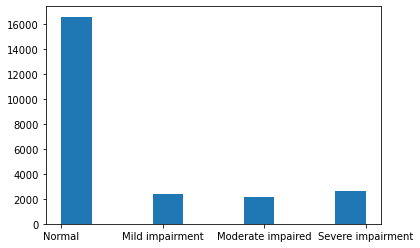

In [25]:
plt.hist(df_sabe['categoria_cognitiva'])

## 1. Identify Null Values(coded as 0,7,8,9,98,99) Across the Dataset

In [26]:
def identify_special_codes(dataframe, codes=[0, 7, 8, 9]):
    """
    Identifies columns in a DataFrame that contain specific numeric codes.
    
    Parameters:
    -----------
    dataframe : pandas DataFrame
        The DataFrame to analyze
    codes : list, default [0, 7, 8, 9]
        The special codes to look for
        
    Returns:
    --------
    dict
        Dictionary with column names as keys and lists of found codes as values
    """
    print(f"Searching for columns containing these special codes: {codes}")
    print(f"Dataset dimensions: {dataframe.shape[0]} rows x {dataframe.shape[1]} columns")
    
    # Dictionary to store columns with special codes
    columns_with_codes = {}
    
    # Check each column for special codes
    for col in dataframe.columns:
        # Check if column is numeric
        if pd.api.types.is_numeric_dtype(dataframe[col]):
            # List to store found codes in this column
            found_codes = []
            
            # Check for each specific code
            for code in codes:
                # Check if the code exists in this column
                if code in dataframe[col].dropna().unique():
                    found_codes.append(code)
                    
            # If any codes found, add to dictionary
            if found_codes:
                columns_with_codes[col] = found_codes
    
    # Report summary
    print(f"\nFound {len(columns_with_codes)} columns containing at least one of the special codes.")
    
    return columns_with_codes

def analyze_special_codes(dataframe, columns_with_codes):
    """
    Performs a detailed analysis of columns containing special codes.
    
    Parameters:
    -----------
    dataframe : pandas DataFrame
        The DataFrame to analyze
    columns_with_codes : dict
        Dictionary with column names and special codes (from identify_special_codes)
    """
    # Count how many times each code appears
    code_counts = {}
    
    for col, codes in columns_with_codes.items():
        for code in codes:
            count = (dataframe[col] == code).sum()
            if code not in code_counts:
                code_counts[code] = 0
            code_counts[code] += count
    
    # Print the code counts
    print("\nTotal occurrences of each special code:")
    for code, count in sorted(code_counts.items()):
        print(f"Code {code}: {count} occurrences")
    
    # Analyze which columns have the most special codes
    col_code_counts = {}
    for col, codes in columns_with_codes.items():
        count = sum((dataframe[col] == code).sum() for code in codes)
        col_code_counts[col] = count
    
    # Print columns with most special codes
    print("\ncolumns with special code occurrences:")
    for col, count in sorted(col_code_counts.items(), key=lambda x: x[1], reverse=True):
        codes_in_col = columns_with_codes[col]
        print(f"{col}: {count} occurrences of codes {codes_in_col}")
        
        # Show detailed counts for this column
        for code in codes_in_col:
            code_count = (dataframe[col] == code).sum()
            code_percent = code_count / dataframe[col].count() * 100
            print(f"  - Code {code}: {code_count} occurrences ({code_percent:.2f}% of non-NULL values)")

In [27]:
  
special_codes = identify_special_codes(df_sabe)
analyze_special_codes(df_sabe, special_codes)

Searching for columns containing these special codes: [0, 7, 8, 9]
Dataset dimensions: 23694 rows x 151 columns

Found 130 columns containing at least one of the special codes.

Total occurrences of each special code:
Code 0: 838488 occurrences
Code 7: 34395 occurrences
Code 8: 41051 occurrences
Code 9: 27869 occurrences

columns with special code occurrences:
no_responde_salida: 23617 occurrences of codes [0]
  - Code 0: 23617 occurrences (99.68% of non-NULL values)
velocidad_3metrosmins: 23573 occurrences of codes [0, 7, 8, 9]
  - Code 0: 23563 occurrences (99.45% of non-NULL values)
  - Code 7: 3 occurrences (0.01% of non-NULL values)
  - Code 8: 6 occurrences (0.03% of non-NULL values)
  - Code 9: 1 occurrences (0.00% of non-NULL values)
participacion_ecologica: 23508 occurrences of codes [0]
  - Code 0: 23508 occurrences (99.21% of non-NULL values)
amputacion: 23274 occurrences of codes [0]
  - Code 0: 23274 occurrences (98.23% of non-NULL values)
salida_desastre: 23271 occurrence

In [28]:
def clean_dataframe(df):
    """
    Function to clean the dataframe by handling missing values and organizing the code.
    Does not alter any values beyond the specified replacements.
    """
    # Create a copy to avoid modifying the original dataframe
    df_clean = df.copy()
    
    # 1. Columns to drop
    columns_to_drop = [
        'no_responde_salida', 'participacion_ecologica', 'hemoglobina', 'glucosa',
        'trigliceridos', 'colesterol_ldl', 'colesterol_total'
    ]
    df_clean = df_clean.drop(columns=columns_to_drop, errors='ignore')
    
    # 2. Replace values {9:np.nan, 8:np.nan, 0:np.nan, 98:np.nan}
    cols_to_change = [
        'percepcion_problemas_auditivos', 'num_times_moved', 'como_le_pagan', 'tipo_de_trabajo',
        'edad_primer_trabajo', 'self_perceived_nutrition', 'comidas_al_dia', 'ingresos',
        'tipo_sanitario', 'afiliacion_pension', 'consumo_cigarrillo',
        'estado_civil'
    ]
    for col in cols_to_change:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].replace({9: np.nan, 8: np.nan, 0: np.nan, 98: np.nan})
    
    # 3. Replace values {98:np.nan, 99:np.nan}
    cols_education_water = ['a_educacion', 'nivel_educativo', 'fuente_agua', 'edad_primer_trabajo','medio_transporte', 'num_people_depending', 'fuente_agua','consulta_medica']
    for col in cols_education_water:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].replace({98: np.nan, 99: np.nan, 88:np.nan})
    
    # 4. Replace values {3:1, 1:3, 9:np.nan, 8:np.nan, 0:np.nan}
    cols_invert_scale = ['sexualidad', 'religion_comfort', 'suficiencia_recursos']
    for col in cols_invert_scale:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].replace({3: 1, 1: 3, 9: np.nan, 8: np.nan, 0: np.nan})
    
    # 5. Replace values for housing_satisfaction
    if 'housing_satisfaction' in df_clean.columns:
        df_clean['housing_satisfaction'] = df_clean['housing_satisfaction'].replace({
            1: 5, 2: 4, 4: 2, 5: 1, 0: np.nan, 8: np.nan, 9: np.nan
        })
    
    # 6. Replace {0:np.nan} for specific columns
    cols_zero_to_nan = [
        'posesion_vivienda', 'fuente_agua', 'circ_branquial',
        'circ_pantorrilla', 'peso', 'energia_cocina', 'tipo_vivienda', 'talla'
    ]
    for col in cols_zero_to_nan:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].replace({0: np.nan})
    
    # 7. Replace {9:np.nan, 8:np.nan, 0:np.nan, 7:np.nan}
    cols_multiple_nan = [
        'uso_servicios_salud', 'auto_percepcion_salud', 'enfermedad_ninez', 'raza',
        'grupo_etnico', 'religion', 'circ_rodilla', 'vida_independiente', 'tipo_alumbrado'
    ]
    for col in cols_multiple_nan:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].replace({9: np.nan, 8: np.nan, 0: np.nan, 7: np.nan})
    
    # 8. Replace {9:np.nan, 8:np.nan, 7:np.nan, 0:np.nan, 2:0}
    cols_to_change_2 = [
        'salud_30_dias', 'maneja_electrodomesticos', 'intelectualmente_activo', 'elderly_respect',
        'necesita_protesis', 'restringe_miedo_caer', 'sentirse_viejo', 'sentirse_limitado',
        'intranquilidad', 'comido_menos', 'estres3_meses', 'utiliza_internet', 'tiene_cocina',
        'utiliza_computador', 'va_al_medico', 'usa_gafas', 'beneficiario_col_mayor',
        'problemas_auditivos', 'enfermedad_mental', 'homeopatia', 'studying',
        'recibio_dinero_ultimo_mes', 'beneficiario_alimentacion', 'tabletas_dormir', 'asma',
        'cancer', 'derrame_cerebral', 'sabe_escribir', 'sabe_leer',
        'habitacion_unica', 'ha_trabajado', 'desplazado', 'ejercicio', 'hospitalizacion'
    ]
    for col in cols_to_change_2:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].replace({9: np.nan, 8: np.nan, 7: np.nan, 0: np.nan, 2: 0})
    
    return df_clean

df_sabe = clean_dataframe(df_sabe)

In [29]:
# Calculate and display missing values
def missing_vals(df):
    missing_values = df.isnull().sum()
    missing_percent = (missing_values / len(df_sabe)) * 100
    missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percent': missing_percent})

    # Sort by most missing
    missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

    return missing_df
   

In [30]:
missing_df =  missing_vals(df_sabe)
# Display top 20 columns with missing values
print(f"Total columns with missing values: {len(missing_df)}")
print("\nTop 20 columns with highest missing values:")
missing_df.head(20)

Total columns with missing values: 99

Top 20 columns with highest missing values:


,Missing Values,Percent
afiliacion_pension,22105,93.293661
percepcion_problemas_auditivos,19700,83.143412
num_times_moved,19530,82.425931
dinamometro,18075,76.285135
como_le_pagan,15815,66.746856
salud_30_dias,15528,65.535579
uso_servicios_salud,14838,62.623449
enfermedad_ninez,13563,57.242340
trabajo_actual,7845,33.109648
maneja_electrodomesticos,7381,31.151346


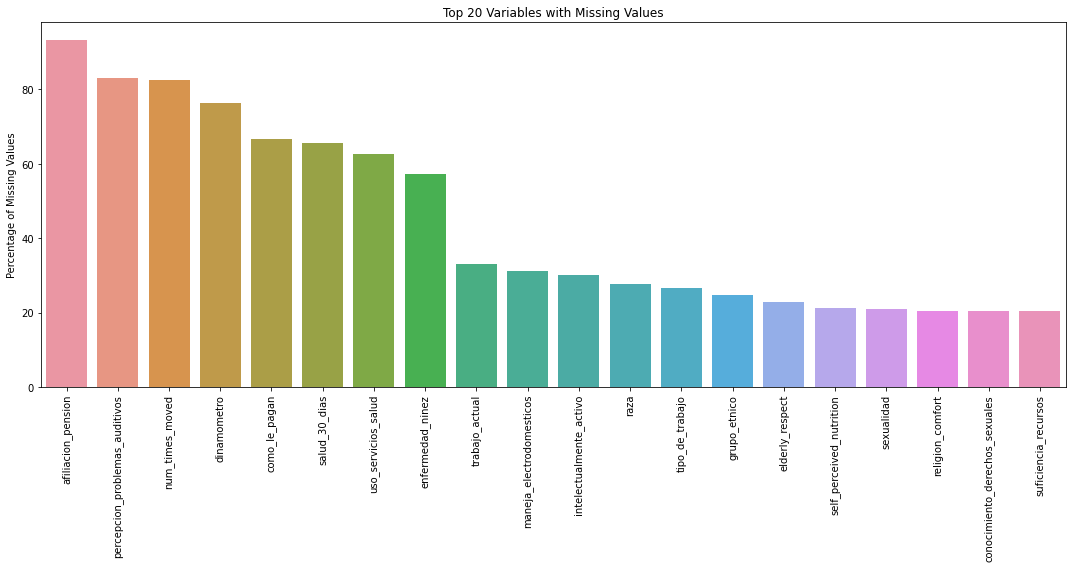

In [31]:
# Visualize columns with most missing values
plt.figure(figsize=(15, 8))
missing_top = missing_df.head(20)
sns.barplot(x=missing_top.index, y='Percent', data=missing_top)
plt.title('Top 20 Variables with Missing Values')
plt.xticks(rotation=90)
plt.ylabel('Percentage of Missing Values')
plt.tight_layout()
plt.show()

In [32]:
#check the variables of interest
print(df_sabe['categoria_cognitiva'].isna().sum())
print(df_sabe['memoria_subjetiva'].isna().sum())

0
4690


In [33]:
# where True means the column has NO missing values
columns_without_na = df_sabe.notna().all()

# To get a list of column names that have no missing values:
columns_without_missing = columns_without_na[columns_without_na].index.tolist()

# To get a list of column names that have at least one missing value:
columns_with_missing = columns_without_na[~columns_without_na].index.tolist()

# Print the results
print(f"Columns with NO missing values ({len(columns_without_missing)}):")
for col in columns_without_missing:
    print(f"- {col}")

print(f"\nColumns WITH missing values ({len(columns_with_missing)}):")
for col in columns_with_missing:
    print(f"- {col}")


Columns with NO missing values (45):
- accesibilidad_vivienda
- salud_ambiental
- vejez_positiva
- vejez_negativa
- uso_medios_tradicionales
- uso_medios_digitales
- uso_redes_sociales_informales
- no_esta_informado
- participacion_religiosa
- participacion_fisica_salud
- participacion_cultural_comunitaria
- participacion_politica_gremial
- participacion_personas_mayores
- no_participa_grupos
- recibe_ayuda
- hace_trabajo_voluntario
- salida_forzada
- salida_desastre
- salida_economica
- salida_servicios
- salida_familiar
- dieta_balanceada
- tiene_depresion
- circ_cintura
- independencia_fuera
- velocidad_3metrosmins
- area_vivienda
- estrato
- sexo
- edad
- num_personas_hogar
- dependencia_economica
- num_rooms_house
- uses_public_transport
- toma_medicamentos
- caer_12_meses
- miedo_caer
- frecuencia_medico
- num_veces_hospitalizado
- amputacion
- minimental
- region
- color_piel
- escala_barthel
- categoria_cognitiva

Columns WITH missing values (99):
- accesibilidad_hogar
- maneja

In [34]:

def drop_high_null_columns(df, threshold):
    """
    Drop columns with null values exceeding the specified threshold percentage.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The input DataFrame
    threshold : float, default 0.2
        The maximum allowed percentage of null values 
        
    Returns:
    --------
    pandas.DataFrame
        DataFrame with high-null columns removed
    list
        List of dropped column names
    """
    # Calculate null percentage for each column
    null_percentage = df.isnull().mean()
    
    # Identify columns exceeding the threshold
    high_null_cols = null_percentage[null_percentage > threshold].index.tolist()
    
    # Print information about dropped columns
    print(f"Found {len(high_null_cols)} columns with more than {threshold*100}% null values")
    
    if high_null_cols:
        print("\nDropped columns and their null percentages:")
        for col in high_null_cols:
            print(f"- {col}: {null_percentage[col]*100:.2f}%")
        
        # Create a new DataFrame without the high-null columns
        df_cleaned = df.drop(columns=high_null_cols)
        print(f"\nRemaining columns: {df_cleaned.shape[1]} (from original {df.shape[1]})")
        
        return df_cleaned, high_null_cols


df_cleaned, dropped_columns = drop_high_null_columns(df_sabe, threshold=0.2)

Found 27 columns with more than 20.0% null values

Dropped columns and their null percentages:
- maneja_electrodomesticos: 31.15%
- intelectualmente_activo: 30.10%
- conocimiento_derechos_sexuales: 20.38%
- enfermedad_ninez: 57.24%
- uso_servicios_salud: 62.62%
- dinamometro: 76.29%
- afiliacion_pension: 93.29%
- grupo_etnico: 24.71%
- raza: 27.82%
- edad_primer_trabajo: 20.28%
- tipo_de_trabajo: 26.64%
- como_le_pagan: 66.75%
- trabajo_actual: 33.11%
- suficiencia_recursos: 20.35%
- religion: 20.33%
- religion_comfort: 20.46%
- elderly_respect: 22.96%
- sentirse_viejo: 20.17%
- num_times_moved: 82.43%
- self_perceived_nutrition: 21.38%
- sexualidad: 20.98%
- intranquilidad: 20.11%
- sentirse_limitado: 20.15%
- percepcion_problemas_auditivos: 83.14%
- necesita_protesis: 20.34%
- restringe_miedo_caer: 20.26%
- salud_30_dias: 65.54%

Remaining columns: 117 (from original 144)


In [35]:
missing_df_cleaned =  missing_vals(df_cleaned)
# Display top 20 columns with missing values
print(f"Total columns with missing values: {len(missing_df)}")
print("\nTop 20 columns with highest missing values:")
missing_df_cleaned.head(20)

Total columns with missing values: 99

Top 20 columns with highest missing values:


,Missing Values,Percent
comido_menos,4727,19.950198
trato_injusto_edad,4727,19.950198
percepcion_visual,4723,19.933316
housing_satisfaction,4716,19.903773
percepcion_tradicional_vejez,4716,19.903773
comidas_al_dia,4710,19.878450
maltrato_familiar,4705,19.857348
maltrato_vejez,4704,19.853127
discriminacion_color_piel,4703,19.848907
percepcion_funcional_vejez,4699,19.832025


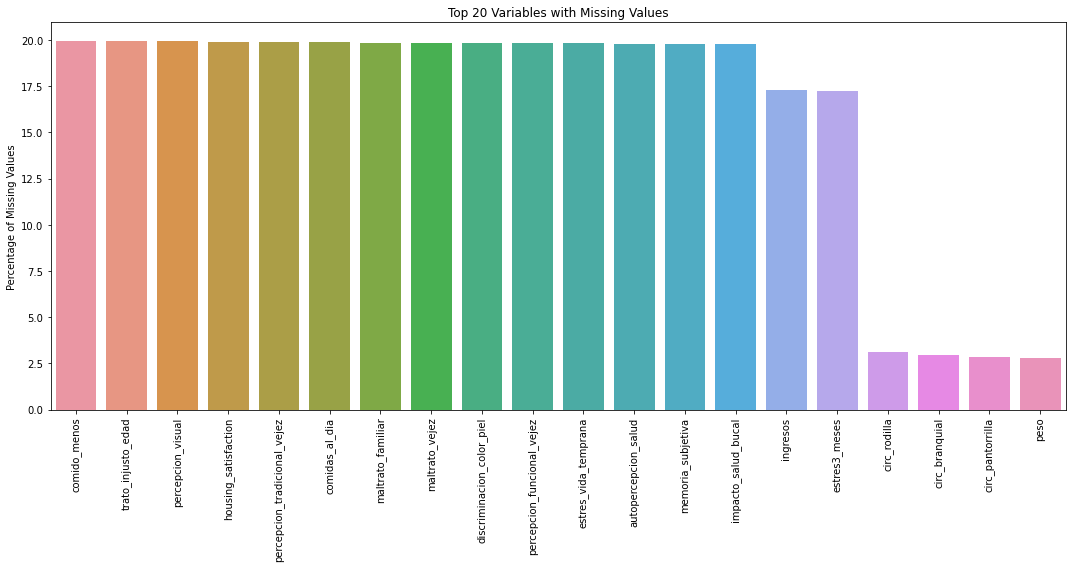

In [36]:
# Visualize columns with most missing values
plt.figure(figsize=(15, 8))
missing_top = missing_df_cleaned.head(20)
sns.barplot(x=missing_top.index, y='Percent', data=missing_top)
plt.title('Top 20 Variables with Missing Values')
plt.xticks(rotation=90)
plt.ylabel('Percentage of Missing Values')
plt.tight_layout()
plt.show()

In [37]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23694 entries, 0 to 23693
Columns: 117 entries, accesibilidad_vivienda to hipertension
dtypes: float64(69), int64(39), object(9)
memory usage: 21.2+ MB


In [38]:
#droping null values, only if they do not affect relevant cognitive variables
important_columns = ['categoria_cognitiva','minimental', 'memoria_subjetiva'] 
df = df_cleaned[df_cleaned[important_columns].notna().all(axis=1)]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19004 entries, 0 to 23693
Columns: 117 entries, accesibilidad_vivienda to hipertension
dtypes: float64(69), int64(39), object(9)
memory usage: 17.1+ MB


## 2. Handle outliers

## Outlier Detection
Detecting outliers in 93 sample numeric columns...

Outliers detected using IQR method (multiplier = 1.5):
accesibilidad_hogar: 2195 outliers (11.55% of data)
accesibilidad_barrio: 1130 outliers (5.95% of data)
seguridad_barrio: 47 outliers (0.25% of data)
salud_ambiental: 1 outliers (0.01% of data)
acceso_servicios_publicos: 2036 outliers (10.71% of data)
vejez_negativa: 1754 outliers (9.23% of data)
participacion_fisica_salud: 1560 outliers (8.21% of data)
participacion_cultural_comunitaria: 1420 outliers (7.47% of data)
participacion_politica_gremial: 762 outliers (4.01% of data)
recibe_ayuda: 278 outliers (1.46% of data)
hace_trabajo_voluntario: 3048 outliers (16.04% of data)
memoria_subjetiva: 1 outliers (0.01% of data)
tiene_depresion: 3031 outliers (15.95% of data)
estres_vida_temprana: 742 outliers (3.90% of data)
autopercepcion_salud: 162 outliers (0.85% of data)
sintomas_ultimo_mes: 161 outliers (0.85% of data)
percepcion_visual: 400 outliers (2.10% of da

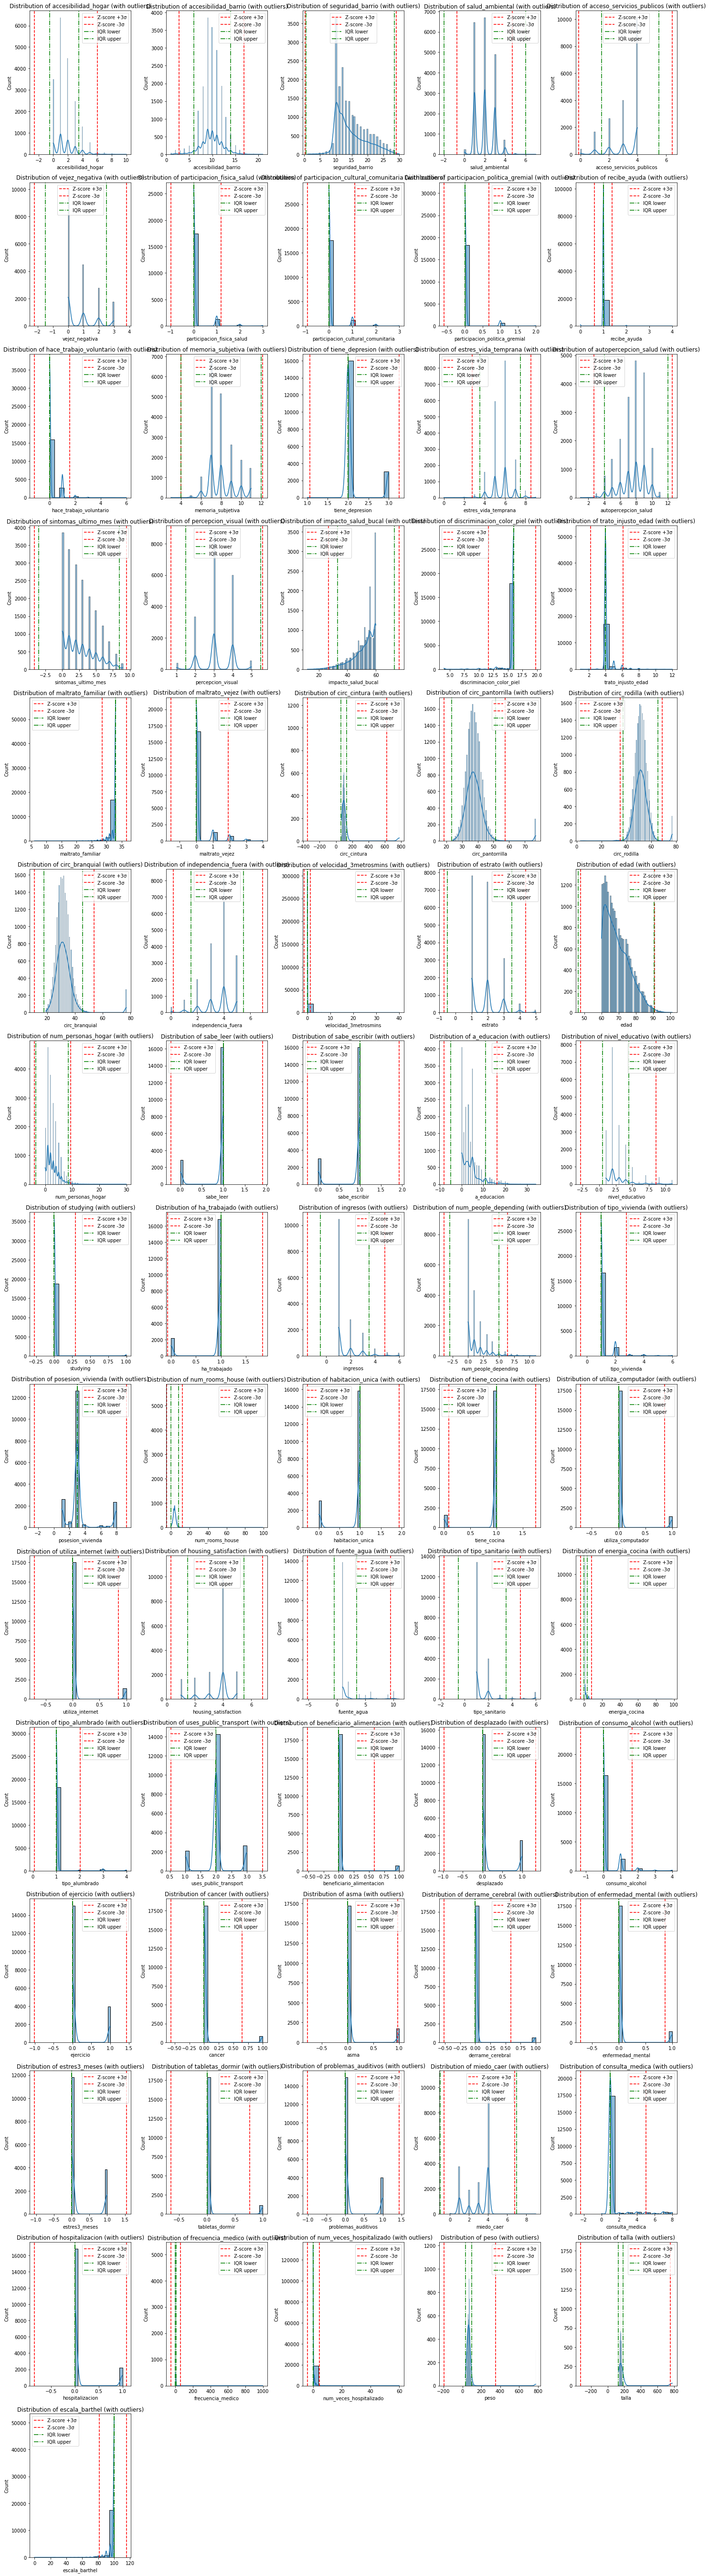

In [40]:
# Add a new section for outlier detection and handling
print("## Outlier Detection")

# Get numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=['int64', 'Int64', 'float64']).columns
# Filter out binary numeric columns (those with only 2 unique values)
non_binary_numeric_cols = [col for col in numeric_cols if df[col].nunique(dropna=False) > 2]

# Create a function to detect outliers using IQR method
def detect_outliers_iqr(df, cols, multiplier=1.5):
    """
    Detect outliers using IQR method
    Returns a dictionary with column names as keys and indices of outliers as values
    """
    outliers = {}
    for col in cols:
        if df[col].isnull().all():
            continue
            
        # Calculate Q1 and Q3
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        # Calculate IQR
        IQR = Q3 - Q1
        
        # Define bounds
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        
        # Find outliers
        outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        
        if len(outlier_indices) > 0:
            outliers[col] = outlier_indices
            
    return outliers

    # Detect outliers in the sample numeric columns
if len(non_binary_numeric_cols) > 0:
    print(f"Detecting outliers in {len(non_binary_numeric_cols)} sample numeric columns...")

    
    # IQR method
    iqr_outliers = detect_outliers_iqr(df, non_binary_numeric_cols)
    
    print("\nOutliers detected using IQR method (multiplier = 1.5):")
    for col, indices in iqr_outliers.items():
        print(f"{col}: {len(indices)} outliers ({len(indices)/len(df):.2%} of data)")
    
    plot_cols = list(iqr_outliers.keys())[:] if iqr_outliers else []

n_cols = 5  # number of plots per row
n_rows = math.ceil(len(plot_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(plot_cols):
    ax = axes[i]
    
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col} (with outliers)')

    # Z-score threshold
    mean = df[col].mean()
    std = df[col].std()
    ax.axvline(mean + 3*std, color='r', linestyle='--', label='Z-score +3σ')
    ax.axvline(mean - 3*std, color='r', linestyle='--', label='Z-score -3σ')

    # IQR threshold
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    ax.axvline(Q1 - 1.5*IQR, color='g', linestyle='-.', label='IQR lower')
    ax.axvline(Q3 + 1.5*IQR, color='g', linestyle='-.', label='IQR upper')

    ax.legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [41]:
#delete these outliers as they might have been coding errors.
mask_outliers = (
    (df['circ_cintura'] > 500) |
    (df['a_educacion'] > 30) |
    (df['num_rooms_house'] > 20) |
    (df['frecuencia_medico'] > 20) |
    (df['num_veces_hospitalizado'] > 20) |
    (df['peso'] > 700) |
    (df['talla'] > 700) |
    (df['circ_cintura'] > 700) |
    (df['circ_rodilla'] > 70) |
    (df['circ_pantorrilla'] > 70)
)

# Drop those rows
df = df[~mask_outliers].copy()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16601 entries, 0 to 23693
Columns: 117 entries, accesibilidad_vivienda to hipertension
dtypes: float64(69), int64(39), object(9)
memory usage: 14.9+ MB


In [43]:
#check for null values across columns based on the variables of interest
def null_values_variables_of_interest(df, variables_of_interest):   
    # Check if our variables of interest exist in the dataframe
    missing_vars = [var for var in variables_of_interest if var not in df.columns]

    # Basic information about the dataset
    print(f"\nDataset Shape: {df.shape}")
    print("\nColumn Types:")
    print(df.dtypes.value_counts())

    # Check how many null values we have per column
    null_counts = df.isnull().sum().sort_values(ascending=False)
    print("\ncolumns with most null values:")
    print(null_counts.head(30))

    # Calculate percentage of null values
    null_percentage = (null_counts / len(df)) * 100
    print("\n columns with highest null percentage:")
    print(null_percentage)

    # If 'categoria_cognitiva' exists, analyze data by this category
    if 'categoria_cognitiva' in df.columns:
        # Get the unique categories and their counts
        cat_counts = df['categoria_cognitiva'].value_counts()
        print("\nCategories in 'categoria_cognitiva' and their counts:")
        print(cat_counts)
        
        # Calculate non-null counts for each column by category
        categories = df['categoria_cognitiva'].unique()
        
        # Create a DataFrame to store the counts
        result_df = pd.DataFrame(index=df.columns)
        
        # For each category, count non-null values for each column
        for cat in categories:
            cat_df = df[df['categoria_cognitiva'] == cat]
            result_df[f'NonNull_{cat}'] = cat_df.count()
            result_df[f'Percentage_{cat}'] = (cat_df.count() / len(cat_df)) * 100
        
        # Add total non-null counts across all categories
        result_df['Total_NonNull'] = df.count()
        result_df['Total_Percentage'] = (df.count() / len(df)) * 100
        
        # Sort by total completeness (higher to lower)
        result_df = result_df.sort_values('Total_Percentage', ascending=False)
        
        print("\nTop 20 columns with most complete data across all categories:")
        print(result_df.head(20))
        
        # Look specifically at completeness for the variables of interest
        interest_cols = [col for col in variables_of_interest if col in df.columns]
        if interest_cols:
            print("\nCompleteness for variables of interest:")
            print(result_df.loc[interest_cols])
            
            # Generate recommendations for columns to keep/drop
            print("\nRecommendations:")
            high_completeness = result_df[result_df['Total_Percentage'] > 75].index.tolist()
            print(f"Consider keeping these columns with >75% completeness: {high_completeness[:10]}...")
            
            low_completeness = result_df[result_df['Total_Percentage'] < 25].index.tolist()
            print(f"Consider dropping these columns with <25% completeness: {low_completeness[:10]}...")
   
    else:
        print("No files found. Please upload a dataset file to analyze.")
    return result_df, interest_cols

In [44]:
variables_of_interest = ['categoria_cognitiva', 'minimental', 'memoria_subjetiva']
result_df, interest_cols = null_values_variables_of_interest(df, variables_of_interest)


Dataset Shape: (16601, 117)

Column Types:
float64    69
int64      39
object      9
dtype: int64

columns with most null values:
estres3_meses                3045
ingresos                     2544
vida_independiente            268
tipo_sanitario                214
fuente_agua                   213
tipo_alumbrado                200
posesion_vivienda             196
acceso_servicios_publicos     193
energia_cocina                192
tipo_vivienda                 190
accesibilidad_barrio          176
rol_trabajo_actual            165
circ_rodilla                  164
circ_pantorrilla              125
circ_branquial                125
utiliza_internet              105
tiene_cocina                  103
utiliza_computador            102
va_al_medico                   69
osteoporosis                   56
a_educacion                    53
beneficiario_col_mayor         52
diabetes                       51
homeopatia                     44
problemas_auditivos            41
recibio_dinero_ulti

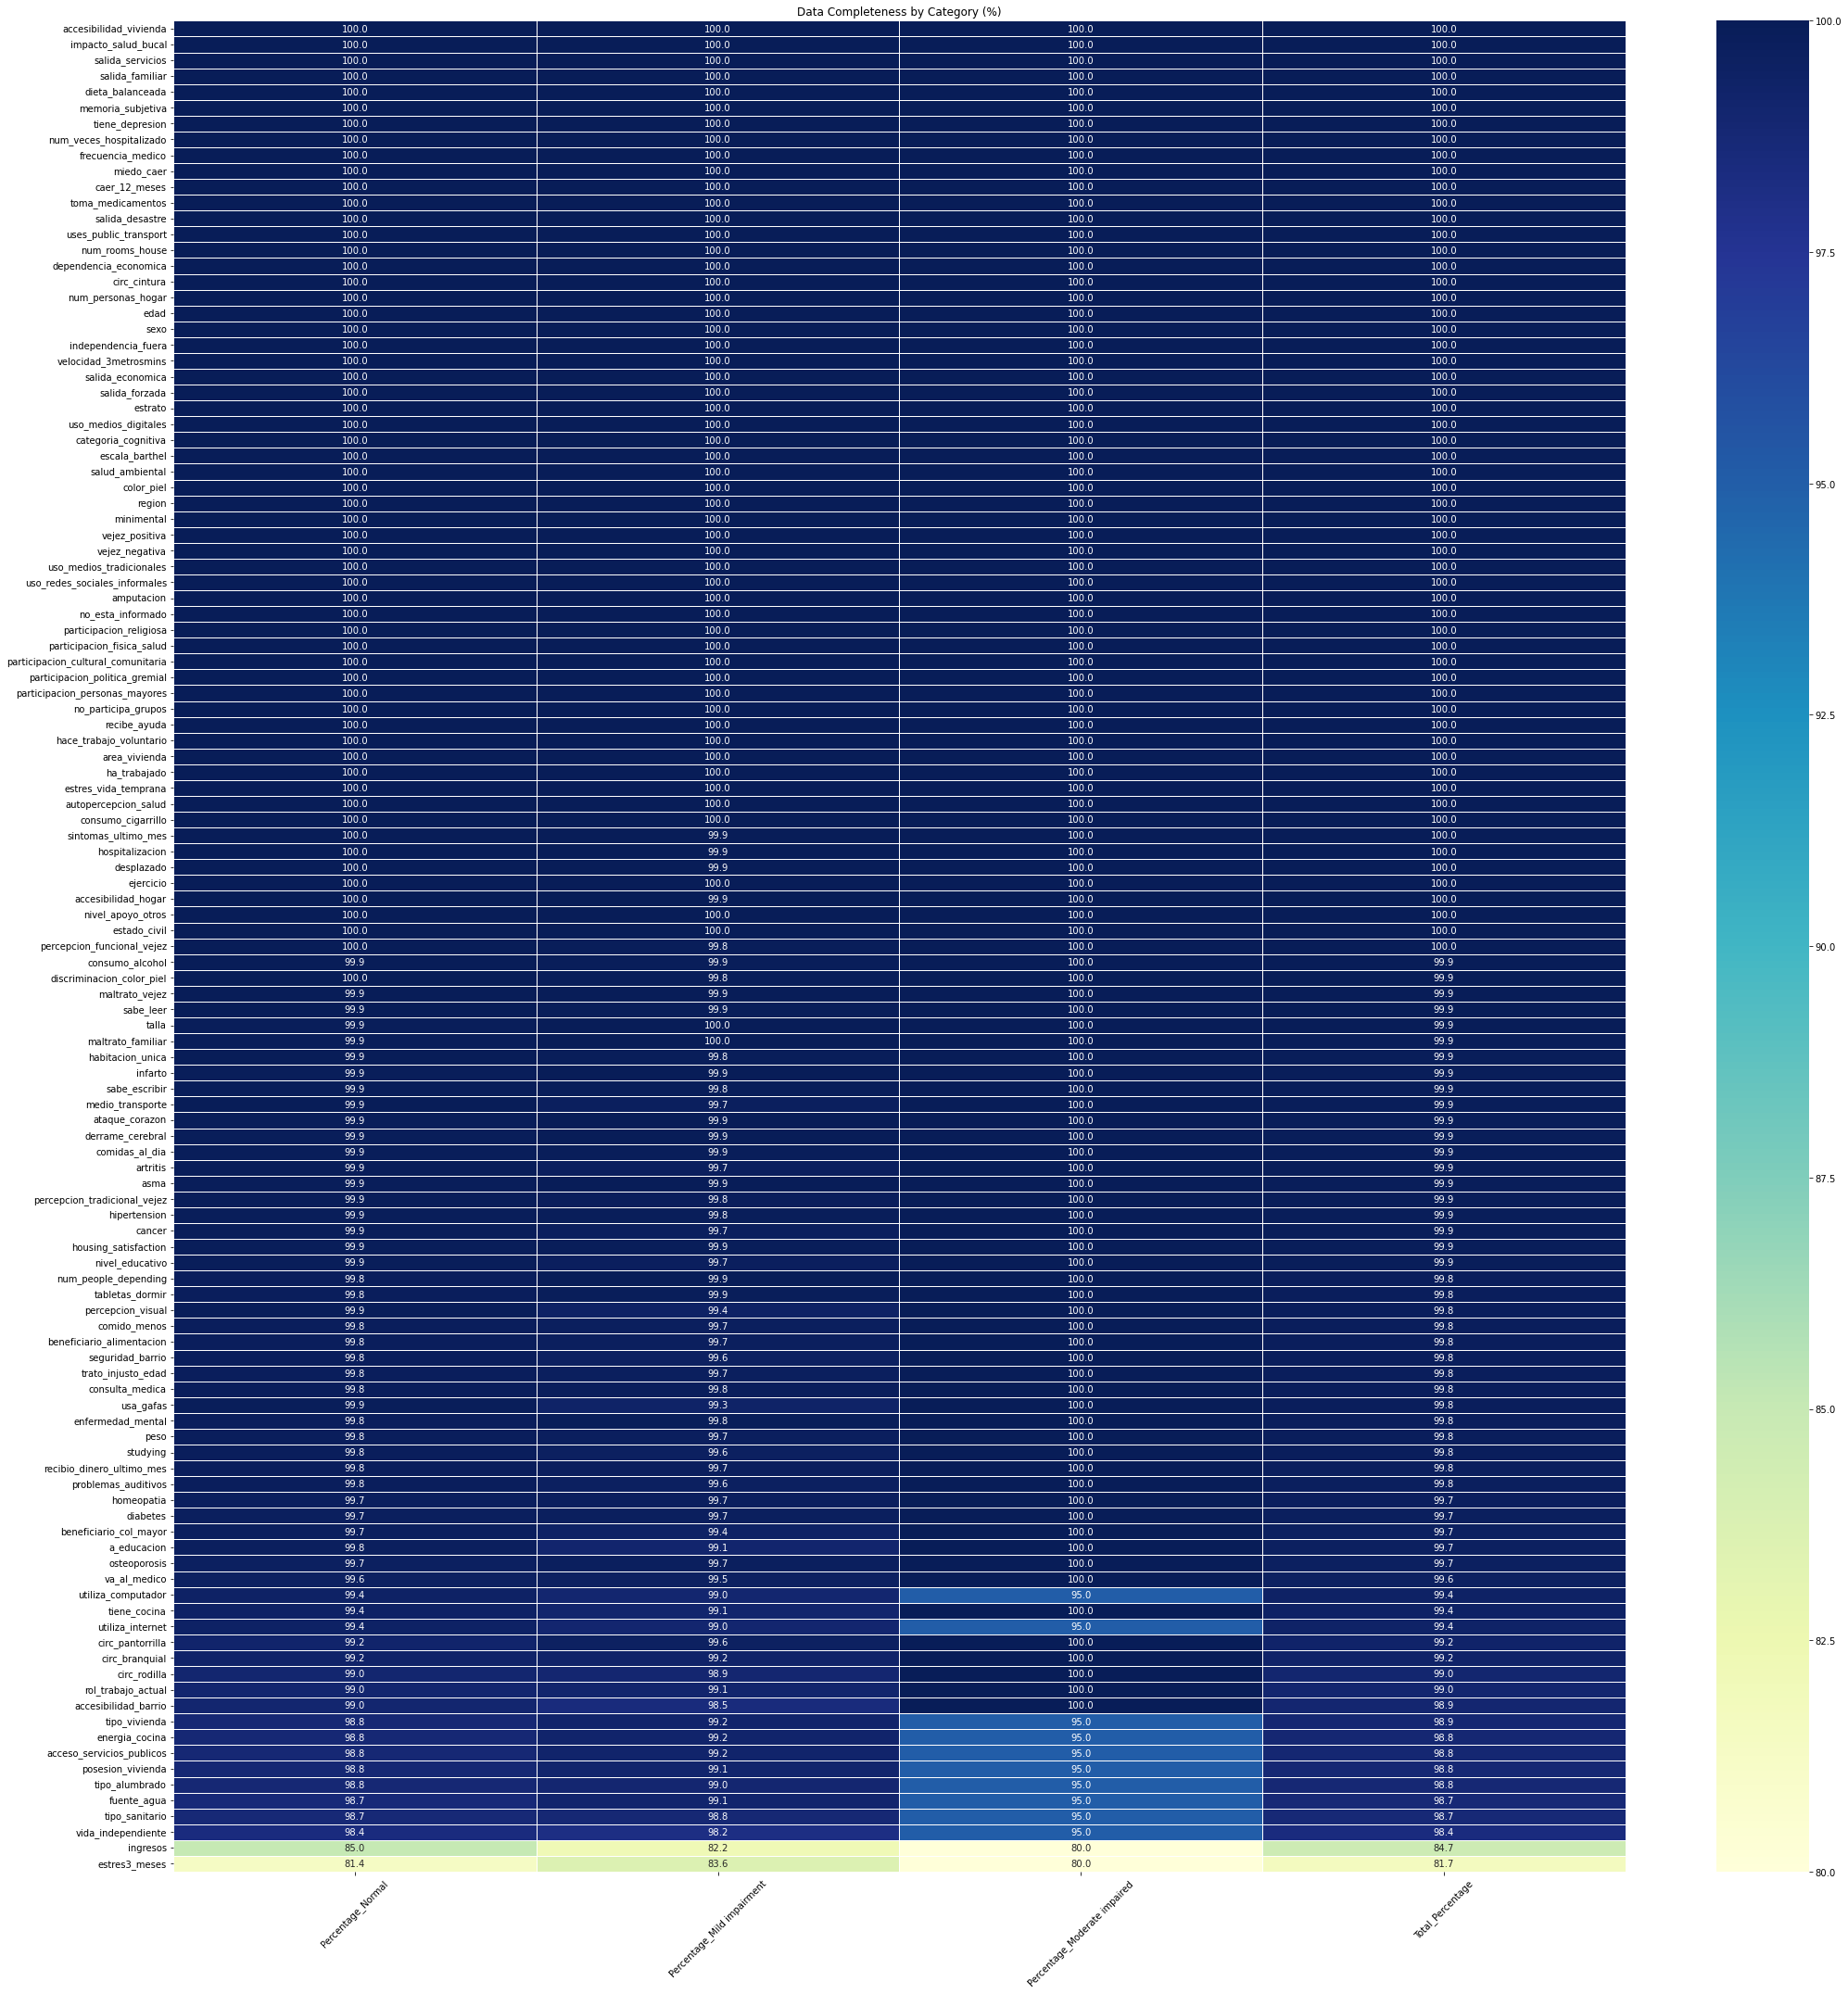

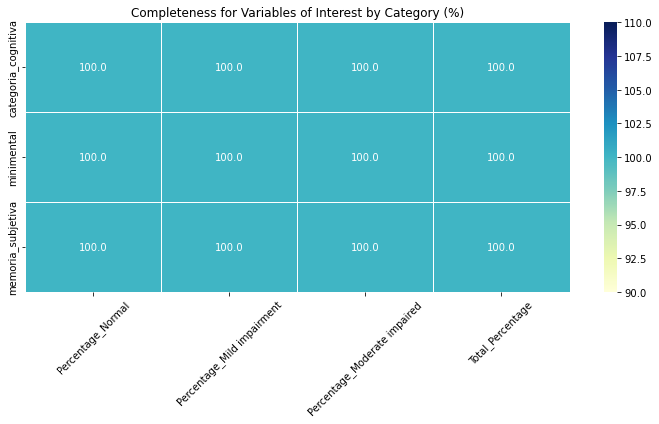

In [45]:
# Create a heatmap to visualize completeness by category
top_columns = result_df.index

# Create a subset with only percentage columns
percentage_cols = [col for col in result_df.columns if 'Percentage' in col]
heatmap_data = result_df.loc[top_columns, percentage_cols]

plt.figure(figsize=(30, 30))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f", linewidths=.5)
plt.title('Data Completeness by Category (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('completeness_heatmap.png')

# Create a visualization that focuses specifically on the variables of interest
if len(interest_cols) > 0:
    plt.figure(figsize=(10, 6))
    interest_data = result_df.loc[interest_cols, percentage_cols]
    sns.heatmap(interest_data, cmap="YlGnBu", annot=True, fmt=".1f", linewidths=.5)
    plt.title('Completeness for Variables of Interest by Category (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('interest_vars_completeness.png')



In [46]:
#drop cols that have high missing entries from categoria_cognitiva(variable of interest)
df = df.drop(columns=['circ_pantorrilla','circ_rodilla','circ_branquial','estres3_meses', 'ingresos','vida_independiente','tipo_sanitario','fuente_agua','tipo_alumbrado','posesion_vivienda','accesibilidad_barrio', 'acceso_servicios_publicos','energia_cocina','tipo_vivienda','rol_trabajo_actual', 'tiene_cocina', 'utiliza_internet','utiliza_computador'])       

In [47]:
#do mode imputation in those columns with a low percentage of missing values from the categories on interest since they are relevant for the study
def mode_imputation_by_category(df, variables_to_impute, category_variable):
    """
    Performs mode imputation for specified variables based on a category variable.
    
    Parameters:
    -----------
    df : pandas DataFrame
        The dataset to work with
    variables_to_impute : list
        List of variables to impute missing values for
    category_variable : str
        Name of the categorical variable to group by for imputation
        
    Returns:
    --------
    pandas DataFrame
        Copy of the original DataFrame with imputed values
    """
    # Create a copy of the dataframe to avoid modifying the original
    df_imputed = df.copy()
        
    # Get unique categories
    categories = df[category_variable].dropna().unique()
    print(f"Performing mode imputation by {category_variable} categories: {categories}")
    
    # Dictionary to store imputation statistics
    imputation_stats = {}
    
    # Process each variable to impute
    for var in variables_to_impute:
        # Skip if variable doesn't exist
        if var not in df.columns:
            print(f"WARNING: Variable '{var}' not found in the dataset. Skipping.")
            continue
            
        # Count missing values before imputation
        missing_before = df[var].isnull().sum()
        if missing_before == 0:
            print(f"Variable '{var}' has no missing values. Skipping.")
            continue
            
        # Store statistics for this variable
        imputation_stats[var] = {
            'missing_before': missing_before,
            'modes_by_category': {}
        }
        
        # For each category, calculate mode and impute
        for category in categories:
            # Get subset for this category
            mask = df[category_variable] == category
            subset = df.loc[mask, var]
            
            # Skip if no values for this category
            if subset.count() == 0:
                continue
                
            # Calculate mode for this category
            mode_value = subset.mode()[0]
            imputation_stats[var]['modes_by_category'][category] = mode_value
            
            # Impute missing values for this category
            missing_mask = mask & df[var].isnull()
            df_imputed.loc[missing_mask, var] = mode_value
        
        # For any remaining missing values, use overall mode
        if df_imputed[var].isnull().sum() > 0:
            overall_mode = df[var].mode()[0]
            df_imputed[var] = df_imputed[var].fillna(overall_mode)
            imputation_stats[var]['overall_mode'] = overall_mode
        
        # Count missing values after imputation
        missing_after = df_imputed[var].isnull().sum()
        imputation_stats[var]['missing_after'] = missing_after
        imputation_stats[var]['imputed_count'] = missing_before - missing_after
        
        print(f"Imputed {missing_before - missing_after} missing values for '{var}'")
    
    return df_imputed, imputation_stats

def print_imputation_report(imputation_stats, category_variable):
    """
    Prints a detailed report of the imputation process.
    
    Parameters:
    -----------
    imputation_stats : dict
        Statistics from the imputation process
    category_variable : str
        Name of the categorical variable used for grouping
    """
    print("\n" + "="*80)
    print(f"MODE IMPUTATION REPORT BY {category_variable.upper()}")
    print("="*80)
    
    for var, stats in imputation_stats.items():
        print(f"\nVARIABLE: {var}")
        print(f"Missing values before: {stats['missing_before']} | After: {stats['missing_after']}")
        print(f"Total values imputed: {stats['imputed_count']}")
        
        print("\nMode values by category:")
        for category, mode in stats['modes_by_category'].items():
            print(f"  - {category_variable} = {category}: {mode}")
        
        if 'overall_mode' in stats:
            print(f"\nOverall mode (used for categories with no data): {stats['overall_mode']}")
        
        print("-"*80)

def impute(df, variables_to_impute, category_variable):
    """
    Performs mode imputation by category and creates visualizations.
    
    Parameters:
    -----------
    df : pandas DataFrame
        The dataset to work with
    variables_to_impute : list
        List of variables to impute missing values for
    category_variable : str
        Name of the categorical variable to group by for imputation
    """
    # Perform imputation
    df_imputed, imputation_stats = mode_imputation_by_category(df, variables_to_impute, category_variable)
    
    return df_imputed
    
    # Print the report
    print_imputation_report(imputation_stats, category_variable)
    


In [48]:
# List of variables to impute
variables_to_impute = [
    'va_al_medico', 'a_educacion', 'osteoporosis', 'diabetes', 
    'beneficiario_col_mayor', 'studying', 'recibio_dinero_ultimo_mes',
    'homeopatia', 'problemas_auditivos', 'consulta_medica', 
    'usa_gafas', 'enfermedad_mental', 'comido_menos', 
    'trato_injusto_edad', 'beneficiario_alimentacion', 'nivel_educativo',
    'seguridad_barrio', 'percepcion_visual', 'tabletas_dormir',
    'num_people_depending', 'housing_satisfaction', 'percepcion_tradicional_vejez',
    'hipertension', 'asma', 'artritis', 'cancer', 'medio_transporte',
    'comidas_al_dia', 'habitacion_unica', 'sabe_escribir', 'discriminacion_color_piel'
]

# 3. Perform imputation by categoria_cognitiva
df_imputed = impute(df, variables_to_impute, 'categoria_cognitiva')


Performing mode imputation by categoria_cognitiva categories: ['Normal' 'Mild impairment' 'Moderate impaired']
Imputed 69 missing values for 'va_al_medico'
Imputed 53 missing values for 'a_educacion'
Imputed 56 missing values for 'osteoporosis'
Imputed 51 missing values for 'diabetes'
Imputed 52 missing values for 'beneficiario_col_mayor'
Imputed 37 missing values for 'studying'
Imputed 39 missing values for 'recibio_dinero_ultimo_mes'
Imputed 44 missing values for 'homeopatia'
Imputed 41 missing values for 'problemas_auditivos'
Imputed 32 missing values for 'consulta_medica'
Imputed 32 missing values for 'usa_gafas'
Imputed 32 missing values for 'enfermedad_mental'
Imputed 29 missing values for 'comido_menos'
Imputed 31 missing values for 'trato_injusto_edad'
Imputed 31 missing values for 'beneficiario_alimentacion'
Imputed 24 missing values for 'nivel_educativo'
Imputed 31 missing values for 'seguridad_barrio'
Imputed 28 missing values for 'percepcion_visual'
Imputed 26 missing value

In [49]:
df_imputed.isna().sum().loc[lambda x: x > 0]

accesibilidad_hogar            4
percepcion_funcional_vejez     8
nivel_apoyo_otros              5
estres_vida_temprana           1
autopercepcion_salud           1
sintomas_ultimo_mes            2
maltrato_familiar             13
maltrato_vejez                11
estado_civil                   6
sabe_leer                     12
ha_trabajado                   1
desplazado                     2
consumo_alcohol               10
consumo_cigarrillo             2
ejercicio                      3
derrame_cerebral              17
hospitalizacion                2
peso                          34
talla                         12
ataque_corazon                17
infarto                       14
dtype: int64

In [50]:
df_imputed.head()

,accesibilidad_vivienda,accesibilidad_hogar,seguridad_barrio,salud_ambiental,percepcion_tradicional_vejez,percepcion_funcional_vejez,vejez_positiva,vejez_negativa,uso_medios_tradicionales,uso_medios_digitales,...,region,color_piel,escala_barthel,categoria_cognitiva,ataque_corazon,diabetes,infarto,osteoporosis,artritis,hipertension
0,4.0,3.0,25.0,2.0,0.0,1.0,0,1,4,2,...,4. BogotÃ¡,medio,100.0,Normal,No stroke,No diabetes,No myocardial infarction,No osteoporosis,No arthrosis_arthritis_rheumatism,No hypertension
3,1.0,1.0,24.0,2.0,1.0,1.0,3,3,4,2,...,4. BogotÃ¡,medio,90.0,Normal,No stroke,No diabetes,Myocardial infarction,No osteoporosis,No arthrosis_arthritis_rheumatism,No hypertension
4,1.0,2.0,22.0,2.0,1.0,2.0,2,0,4,2,...,4. BogotÃ¡,medio,100.0,Normal,No stroke,Diabetes,No myocardial infarction,No osteoporosis,No arthrosis_arthritis_rheumatism,Hypertension
5,3.0,2.0,26.0,3.0,0.0,3.0,2,0,4,2,...,4. BogotÃ¡,medio,100.0,Normal,No stroke,No diabetes,No myocardial infarction,No osteoporosis,No arthrosis_arthritis_rheumatism,No hypertension
7,4.0,0.0,22.0,1.0,1.0,2.0,1,1,4,2,...,4. BogotÃ¡,claro,100.0,Normal,No stroke,No diabetes,Myocardial infarction,No osteoporosis,Arthrosis_Arthritis_Rheumatism,No hypertension


In [51]:
# Get columns with missing values
df_imputed.isna().sum().loc[lambda x: x > 0]
for col in df_imputed.columns:
    if df_imputed[col].isna().sum() > 0:
        mode_value = df_imputed[col].mode().iloc[0]
        df_imputed[col].fillna(mode_value, inplace=True)



In [52]:
#imputing mode values for those columns above
for col in df_imputed.columns:
    if df_imputed[col].isna().sum() > 0:
        mode_value = df_imputed[col].mode().iloc[0]
        df_imputed[col].fillna(mode_value, inplace=True)

In [53]:
df_imputed.isna().sum().loc[lambda x: x > 0]

Series([], dtype: int64)

In [54]:
df_imputed['categoria_cognitiva'].value_counts()

Normal               14633
Mild impairment       1948
Moderate impaired       20
Name: categoria_cognitiva, dtype: int64

## 3. Create dummy variables/ convert categorical into ordinal if applies

In [55]:
# Identify columns that are not numeric (text, dates, etc.)
print("## Identifying Non-Numeric Columns")

# Get all columns that are not numeric
non_numeric_cols = df.select_dtypes(exclude=['int64', 'Int64', 'float64', 'bool']).columns.tolist()

if non_numeric_cols:
    print(f"Found {len(non_numeric_cols)} non-numeric columns:")
    
    # Create a dictionary to categorize non-numeric columns by data type
    type_groups = {}
    for col in non_numeric_cols:
        col_type = str(df[col].dtype)
        if col_type not in type_groups:
            type_groups[col_type] = []
        type_groups[col_type].append(col)
    
    # Print the counts by data type
    for dtype, cols in type_groups.items():
        print(f"\n{dtype}: {len(cols)} columns")
        # Print a few example column names
        print(f"Examples: {cols[:5]}")
        
        # For object dtype, try to identify if they are categorical, text, or dates
        if dtype == 'object':
            for col in cols[:5]:  # Check the first few columns
                # Count unique values
                unique_count = df[col].nunique()
                total_count = df[col].count()
                
                # Check if this looks like a categorical variable (few unique values)
                if unique_count < 20:
                    print(f"  - {col}: Appears to be categorical with {unique_count} unique values")
                    # Show the unique values
                    unique_vals = df[col].unique()
                    print(f"    Values: {unique_vals[:10]}{'...' if len(unique_vals) > 10 else ''}")
                else:
                    # Check if it might be a date
                    try:
                        pd.to_datetime(df[col].dropna().iloc[0])
                        print(f"  - {col}: May contain dates (sample: {df[col].dropna().iloc[0]})")
                    except:
                        # Probably text data
                        print(f"  - {col}: Text data with {unique_count} unique values ({unique_count/total_count:.2%} of non-missing values)")
                        # Sample a few values
                        sample_vals = df[col].dropna().sample(min(3, df[col].dropna().shape[0])).values
                        print(f"    Sample values: {sample_vals}")
else:
    print("No non-numeric columns found in the dataset.")

## Identifying Non-Numeric Columns
Found 9 non-numeric columns:

object: 9 columns
Examples: ['region', 'color_piel', 'categoria_cognitiva', 'ataque_corazon', 'diabetes']
  - region: Appears to be categorical with 6 unique values
    Values: ['4. BogotÃ¡' '5. Central' '6. PacÃ\xadfica' '1. AtlÃ¡ntico' '2. Oriental'
 '3. Orinoquia y Amazonia']
  - color_piel: Appears to be categorical with 3 unique values
    Values: ['medio' 'claro' 'oscuro']
  - categoria_cognitiva: Appears to be categorical with 3 unique values
    Values: ['Normal' 'Mild impairment' 'Moderate impaired']
  - ataque_corazon: Appears to be categorical with 2 unique values
    Values: ['No stroke' nan 'Stroke']
  - diabetes: Appears to be categorical with 2 unique values
    Values: ['No diabetes' 'Diabetes' nan]


In [56]:
#convert cat variables in ordinal when works
df['categoria_cognitiva'] = df['categoria_cognitiva'].replace({'Normal':1, 'Mild impairment':2, 'Moderate impared': 3})
df['categoria_cognitiva'] = df['ataque_corazon'].replace({'No stroke':0, 'Stroke':1})
df['categoria_cognitiva']= df['diabetes'].replace({'No diabetes':0, 'Diabetes':1})
df['color_piel'].replace({'claro':1,'medio':2,'oscuro':3})

0        2
3        2
4        2
5        2
7        1
        ..
23689    1
23690    1
23691    1
23692    1
23693    2
Name: color_piel, Length: 16601, dtype: int64

In [57]:
# Map original region names to cleaned names
region_mapping = {
    '2. Oriental': 'oriental',
    '1. AtlÃ¡ntico': 'atlantico',
    '6. PacÃ\xadfica': 'pacifica',
    '5. Central': 'central',
    '4. BogotÃ¡': 'bogota'
}

df['region'] = df['region'].map(region_mapping)

# Create dummy variables
region_dummies = pd.get_dummies(df['region'], prefix='region')

# concatenate the dummies to the original DataFrame
df = pd.concat([df, region_dummies], axis=1)

In [71]:
df.to_csv('sabe_df_prepared.csv', index=False)  

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16601 entries, 0 to 23693
Columns: 104 entries, accesibilidad_vivienda to region_pacifica
dtypes: Int64(52), int64(39), object(8), uint8(5)
memory usage: 13.6+ MB
